# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
# Examinar el enecabezado del dataset
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
# Dimensiones del dataframe
websites.shape

(1781, 21)

In [5]:
# Tipo de datos: 
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [6]:
print('------------------------------ Columnas tipo string --------------------------------')
for c in websites.columns:
    if websites[c].dtype =='O':
        print('___________________')
        print(c)
        print('Total de valores únicos:', len(websites[c].unique()))
        print('Top 20 de valores únicos:')
        display(websites[c].value_counts().to_frame().head(20))

------------------------------ Columnas tipo string --------------------------------
___________________
URL
Total de valores únicos: 1781
Top 20 de valores únicos:


,URL
B0_2048,1
B0_34,1
B0_1003,1
B0_785,1
B0_1008,1
M4_57,1
B0_2017,1
B0_370,1
B0_102,1
B0_2041,1


___________________
CHARSET
Total de valores únicos: 9
Top 20 de valores únicos:


,CHARSET
UTF-8,676
ISO-8859-1,427
utf-8,379
us-ascii,155
iso-8859-1,134
None,7
ISO-8859,1
windows-1251,1
windows-1252,1


___________________
SERVER
Total de valores únicos: 240
Top 20 de valores únicos:


,SERVER
Apache,386
nginx,211
None,175
Microsoft-HTTPAPI/2.0,113
cloudflare-nginx,94
Microsoft-IIS/7.5,51
GSE,49
Server,49
YouTubeFrontEnd,42
nginx/1.12.0,36


___________________
WHOIS_COUNTRY
Total de valores únicos: 49
Top 20 de valores únicos:


,WHOIS_COUNTRY
US,1103
None,306
CA,84
ES,63
AU,35
PA,21
GB,19
JP,11
CN,10
UK,10


___________________
WHOIS_STATEPRO
Total de valores únicos: 182
Top 20 de valores únicos:


,WHOIS_STATEPRO
CA,372
None,362
NY,75
WA,65
Barcelona,62
FL,61
Arizona,58
California,57
ON,45
NV,30


___________________
WHOIS_REGDATE
Total de valores únicos: 891
Top 20 de valores únicos:


,WHOIS_REGDATE
None,127
17/09/2008 0:00,62
13/01/2001 0:12,59
31/07/2000 0:00,47
15/02/2005 0:00,41
29/03/1997 0:00,33
1/11/1994 0:00,30
18/01/1995 0:00,25
2/11/2002 0:00,21
5/01/1996 0:00,17


___________________
WHOIS_UPDATED_DATE
Total de valores únicos: 594
Top 20 de valores únicos:


,WHOIS_UPDATED_DATE
None,139
2/09/2016 0:00,64
12/12/2015 10:16,59
29/06/2016 0:00,47
14/01/2017 0:00,42
29/11/2016 0:00,36
26/08/2015 0:00,31
21/10/2016 0:00,30
30/04/2014 0:00,29
3/03/2017 0:00,27


In [7]:
# Columna type
websites['Type'].value_counts()

0    1565
1     216
Name: Type, dtype: int64

In [8]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [9]:
"""
De las visualizaciones anteriores se observa:

 1. Las variables WHOIS_REGDATE, WHOIS_UPDATED_DATE corresponden a variables de tipo date
 
 2. La variable URL funciona como identificador único, sin embargo no tiene relevancia para el modelo, por lo que
    se eliminará
    
 3. La variable target corresponde a Type, donde 0 indica que se trata de un benign website y 1 malicious website
 
 4. Las demás variables, en un inicio, se pueden considerar como features en el modelo.
 
"""

'\nDe las visualizaciones anteriores se observa:\n\n 1. Las variables WHOIS_REGDATE, WHOIS_UPDATED_DATE corresponden a variables de tipo date\n \n 2. La variable URL funciona como identificador único, sin embargo no tiene relevancia para el modelo, por lo que\n    se eliminará\n    \n 3. La variable target corresponde a Type, donde 0 indica que se trata de un benign website y 1 malicious website\n \n 4. Las demás variables, en un inicio, se pueden considerar como features en el modelo.\n \n'

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

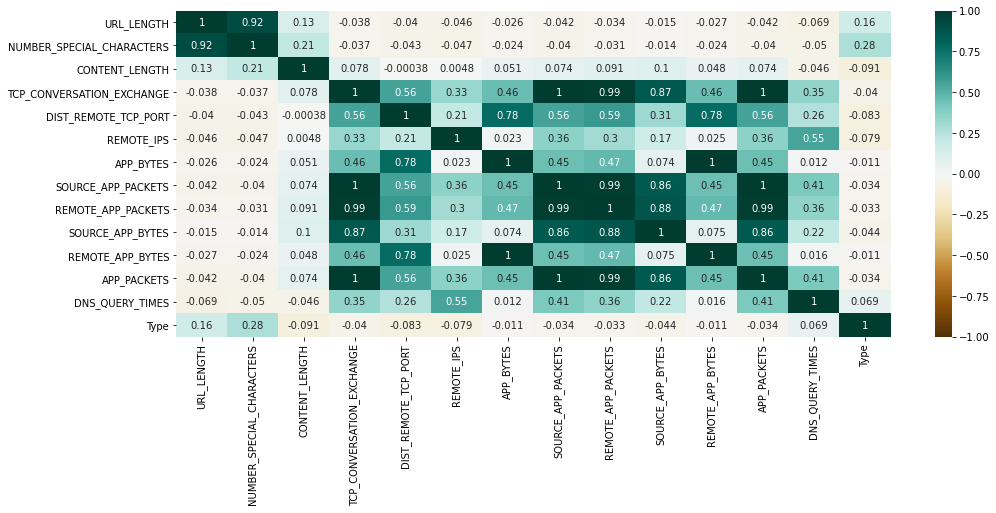

In [10]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
correlacion = websites.corr()
heatmap = sns.heatmap(correlacion, vmin=-1, vmax=1, annot=True, cmap='BrBG')


In [11]:
"""
Observaciones:
    1. La variables URL_LENGHT y NUMBER_SPECIAL_CHARACTERS están altamente correlacionadas por lo que se
       tomará solamente una de estas variables.
       
    2. La variable TCP_CONVERSATION_EXCHANGE posee una correlación altamente significativa con las variables:
            * APP_PACKETS
            * REMOTE_APP_PACKETS
            * SOURCE_APP_PACKETS
    
    3. La variables APP_BYTES y REMOTE_APP_BYTES están altamente correlacionadas.
            
"""

'\nObservaciones:\n    1. La variables URL_LENGHT y NUMBER_SPECIAL_CHARACTERS están altamente correlacionadas por lo que se\n       tomará solamente una de estas variables.\n       \n    2. La variable TCP_CONVERSATION_EXCHANGE posee una correlación altamente significativa con las variables:\n            * APP_PACKETS\n            * REMOTE_APP_PACKETS\n            * SOURCE_APP_PACKETS\n    \n    3. La variables APP_BYTES y REMOTE_APP_BYTES están altamente correlacionadas.\n            \n'

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [12]:
# Your code here
remove_var = ['NUMBER_SPECIAL_CHARACTERS', 'REMOTE_APP_BYTES', 'TCP_CONVERSATION_EXCHANGE', 
              'REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS']

websites.drop( remove_var, axis = 1, inplace =True)

In [13]:
# Your comment here
# El criterio para eliminar variables es quedarme con aquella que sea más fácil de explicar, 
# por ejemplo, es más sencillo entender a qué se refiere la longitud de la url a decir cuál
# es el número de caracteres especiales. 

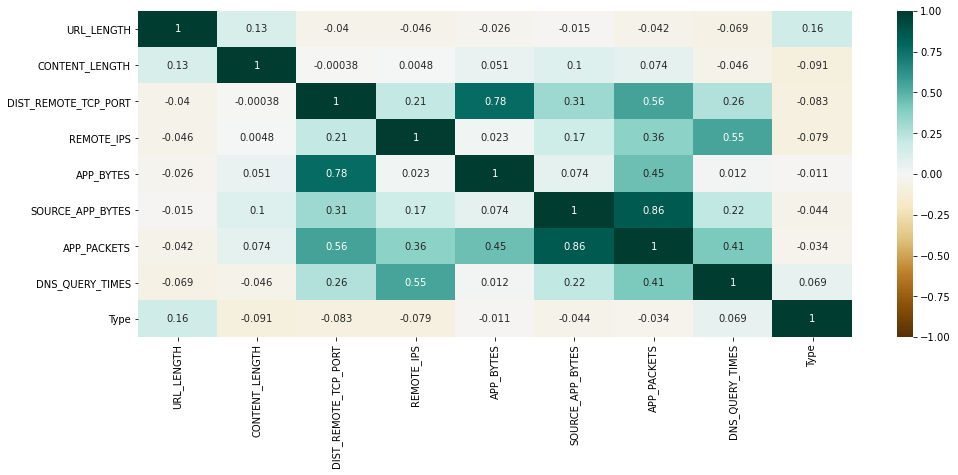

In [14]:
# Print heatmap again
plt.figure(figsize=(16, 6))
correlacion = websites.corr()
heatmap = sns.heatmap(correlacion, vmin=-1, vmax=1, annot=True, cmap='BrBG')


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [15]:
# Your code here
# Conocer el % de nulos en el dataset
t_missing_values = (websites.isna().sum()/websites.shape[0]*100).to_frame()
t_missing_values.rename(columns={0: 'Porcentaje de vacíos'})

,Porcentaje de vacíos
URL,0.000000
URL_LENGTH,0.000000
CHARSET,0.000000
SERVER,0.056148
CONTENT_LENGTH,45.592364
WHOIS_COUNTRY,0.000000
WHOIS_STATEPRO,0.000000
WHOIS_REGDATE,0.000000
WHOIS_UPDATED_DATE,0.000000
DIST_REMOTE_TCP_PORT,0.000000


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [16]:
# Your code here
websites.drop('CONTENT_LENGTH', axis=1, inplace=True)

websites.dropna(inplace=True)

In [17]:
# Your comment here
"""
 * La variable CONTENT_LENGTH tiene un porcentaje de aproximado del 45 % de vacíos por lo que es 
    recomendable eliminar la columna.
 * SERVER y DNS_QUERY_TIMES tiene solamente el 0.056% de nulos, por lo que se quitarán estos registros
    
"""

'\n * La variable CONTENT_LENGTH tiene un porcentaje de aproximado del 45 % de vacíos por lo que es \n    recomendable eliminar la columna.\n * SERVER y DNS_QUERY_TIMES tiene solamente el 0.056% de nulos, por lo que se quitarán estos registros\n    \n'

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [18]:
# Examine missing values in each column
t_missing_values = (websites.isna().sum()/websites.shape[0]*100).to_frame()
t_missing_values.rename(columns={0: 'Porcentaje de vacíos'})

,Porcentaje de vacíos
URL,0.0
URL_LENGTH,0.0
CHARSET,0.0
SERVER,0.0
WHOIS_COUNTRY,0.0
WHOIS_STATEPRO,0.0
WHOIS_REGDATE,0.0
WHOIS_UPDATED_DATE,0.0
DIST_REMOTE_TCP_PORT,0.0
REMOTE_IPS,0.0


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [19]:
# Your code here
print('Total de valores únicos:', len(websites['WHOIS_COUNTRY'].unique()))
print(sorted(websites['WHOIS_COUNTRY'].unique()))

Total de valores únicos: 49
['AE', 'AT', 'AU', 'BE', 'BR', 'BS', 'BY', 'CA', 'CH', 'CN', 'CZ', 'Cyprus', 'DE', 'ES', 'FR', 'GB', 'HK', 'IE', 'IL', 'IN', 'IT', 'JP', 'KG', 'KR', 'KY', 'LU', 'LV', 'NL', 'NO', 'None', 'PA', 'PH', 'PK', 'RU', 'SC', 'SE', 'SI', 'TH', 'TR', 'UA', 'UG', 'UK', 'US', 'UY', 'United Kingdom', "[u'GB'; u'UK']", 'ru', 'se', 'us']


In [20]:
# Pasamos todos los valores a mayusculas para homologar casos como SE y se 
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].str.upper()

# Cyrus a CY
websites['WHOIS_COUNTRY'].loc[ websites['WHOIS_COUNTRY'] == 'CYPRUS'] = 'CY'

# Casos
websites['WHOIS_COUNTRY'].loc[ websites['WHOIS_COUNTRY'] == 'UNITED KINGDOM'] = 'UK'
websites['WHOIS_COUNTRY'].loc[ websites['WHOIS_COUNTRY'] == "[U'GB'; U'UK']"] = 'GB'


C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
# Comprobación
print('Total de valores únicos:', len(websites['WHOIS_COUNTRY'].unique()))
print(sorted(websites['WHOIS_COUNTRY'].unique()))

Total de valores únicos: 44
['AE', 'AT', 'AU', 'BE', 'BR', 'BS', 'BY', 'CA', 'CH', 'CN', 'CY', 'CZ', 'DE', 'ES', 'FR', 'GB', 'HK', 'IE', 'IL', 'IN', 'IT', 'JP', 'KG', 'KR', 'KY', 'LU', 'LV', 'NL', 'NO', 'NONE', 'PA', 'PH', 'PK', 'RU', 'SC', 'SE', 'SI', 'TH', 'TR', 'UA', 'UG', 'UK', 'US', 'UY']


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

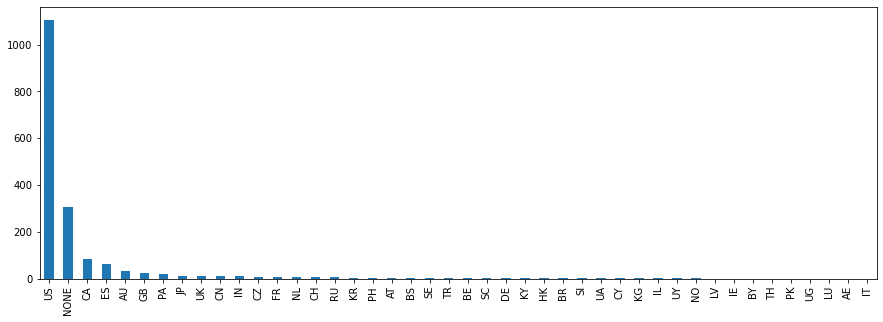

In [22]:
# Your code here
fig, ax = plt.subplots(figsize=(15, 5))
g = websites['WHOIS_COUNTRY'].value_counts().plot(kind='bar');

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [23]:
# Your code here
# Tomamos los primeros 10 valores (excluyendo None) y guardamos en una list aux 
lst_country = websites['WHOIS_COUNTRY'].value_counts().head(11).index.tolist()
lst_country.remove('NONE')

# Hacemos la transformación sobre la columna
websites['WHOIS_COUNTRY'].loc[ ~websites['WHOIS_COUNTRY'].isin(lst_country) ] = 'OTHER'

C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [24]:
# Your code here
websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis =1, inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [25]:
# Your code here
websites.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [26]:
# Your code here
websites.drop('URL', axis = 1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [27]:
# Your code here
websites['CHARSET'].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

In [28]:
# Se pueden homologar algunos valores convirtiendolos a mayusculas
websites['CHARSET'] = websites['CHARSET'].str.upper()

In [29]:
# Verificar
websites['CHARSET'].unique()

array(['ISO-8859-1', 'UTF-8', 'US-ASCII', 'NONE', 'WINDOWS-1251',
       'ISO-8859', 'WINDOWS-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [30]:
# Your code here
print('Total de valores únicos:', len(websites['SERVER'].unique()))
websites['SERVER'].value_counts().head(50)

Total de valores únicos: 239


Apache                                                                                       385
nginx                                                                                        211
None                                                                                         175
Microsoft-HTTPAPI/2.0                                                                        113
cloudflare-nginx                                                                              94
Microsoft-IIS/7.5                                                                             51
GSE                                                                                           49
Server                                                                                        49
YouTubeFrontEnd                                                                               42
nginx/1.12.0                                                                                  36
ATS                           

![Think Hard](../think-hard.jpg)

In [31]:
# Your comment here
# Se observan que aunque no sean las mismas versiones se distinguen valores rescatables como nginx, Microsoft y Apache

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [32]:
# Your code here
def replace_server(x):
    x = x.upper()
    if 'MICROSOFT' in x:
        return 'MICROSOFT'
    elif 'APACHE' in x:
        return 'APACHE'
    elif 'NGINX' in x:
        return 'NGINX'
    else:
        return 'OTHER'

# Aplicamos la funcion a la columna
websites['SERVER'] = websites['SERVER'].apply(lambda x: replace_server(x))

In [33]:
# Count `SERVER` value counts here
websites['SERVER'].value_counts()

APACHE       642
OTHER        503
NGINX        436
MICROSOFT    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [34]:
# Your code here
website_dummy =  pd.get_dummies(websites, drop_first = True)
website_dummy

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_ISO-8859-1,CHARSET_NONE,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,16,0,2,700,1153,9,2.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,16,7,4,1230,1265,17,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,16,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,17,22,3,3812,18784,39,8.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,17,2,5,4278,129889,61,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,0,0,0,186,0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1777,198,0,0,0,124,0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1778,201,2,6,6631,132181,87,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1779,234,0,0,0,0,0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [35]:
# Your code here
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL_LENGTH            1779 non-null   int64  
 1   DIST_REMOTE_TCP_PORT  1779 non-null   int64  
 2   REMOTE_IPS            1779 non-null   int64  
 3   APP_BYTES             1779 non-null   int64  
 4   SOURCE_APP_BYTES      1779 non-null   int64  
 5   APP_PACKETS           1779 non-null   int64  
 6   DNS_QUERY_TIMES       1779 non-null   float64
 7   Type                  1779 non-null   int64  
 8   CHARSET_ISO-8859-1    1779 non-null   uint8  
 9   CHARSET_NONE          1779 non-null   uint8  
 10  CHARSET_US-ASCII      1779 non-null   uint8  
 11  CHARSET_UTF-8         1779 non-null   uint8  
 12  CHARSET_WINDOWS-1251  1779 non-null   uint8  
 13  CHARSET_WINDOWS-1252  1779 non-null   uint8  
 14  SERVER_MICROSOFT      1779 non-null   uint8  
 15  SERVER_NGINX         

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Your code here:
X = website_dummy.drop('Type', axis =1)

y= website_dummy['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8) 

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [37]:
# Your code here:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(random_state=0)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [38]:
# Your code here:
model_1.fit(X_train, y_train)

C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [39]:
# Your code here:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

y_pred = model_1.predict(X_test)

print('Confussion Matrix :')
print(confusion_matrix(y_test, y_pred, normalize = 'true')*100)
print('Accuracy Score :', accuracy_score(y_test, y_pred))


Confussion Matrix :
[[97.76357827  2.23642173]
 [76.74418605 23.25581395]]
Accuracy Score : 0.8876404494382022


What are your thoughts on the performance of the model? Write your conclusions below.

In [40]:
# Your conclusions here:
# El accurancy Score es de 0.88 (cercano a 1), sin embargo con base en la matriz de confusión,
# Se observa que aprox el 76%  de los websites clasificados en un inicio como 1, los clasifica como 0

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [41]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

knc_model = KNeighborsClassifier(n_neighbors=3)
knc_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [42]:
# Your code here:
y_pred = knc_model.predict(X_test)

print('Confussion Matrix :')
print(confusion_matrix(y_test, y_pred, normalize = 'true')*100)
print('Accuracy Score :', accuracy_score(y_test, y_pred))

Confussion Matrix :
[[97.44408946  2.55591054]
 [46.51162791 53.48837209]]
Accuracy Score : 0.9213483146067416


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [43]:
# Your code here:
knc_model_5 = KNeighborsClassifier(n_neighbors=5)
knc_model_5.fit(X_train, y_train)


KNeighborsClassifier()

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [44]:
# Your conclusions here:
y_pred = knc_model_5.predict(X_test)

print('Confussion Matrix :')
print(confusion_matrix(y_test, y_pred, normalize = 'true')*100)
print('Accuracy Score :', accuracy_score(y_test, y_pred))


Confussion Matrix :
[[98.40255591  1.59744409]
 [51.1627907  48.8372093 ]]
Accuracy Score : 0.9241573033707865


In [ ]:
# El accurancy score se mantiene practicamente igual, sin embargo, considerando cuando pasamos de k=3 a k=5, 
# incrementa el accurancy en 1% sobre los websites de tipo 0 pero se pierde porcentaje de aciertos sobre los
# websites clasificados como 1.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [45]:
# Your code here